In [1]:
import os
#os.environ['OPENBLAS_NUM_THREADS'] = '20'
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import scipy as sp
#import colorcet as cc
import matplotlib.pyplot as plt
#import libpysal as lps
import random
from matplotlib import rcParams
import seaborn as sns
import multiome.functional_anno as functional_anno

sc.set_figure_params(
    scanpy=True, dpi_save=600, vector_friendly=True, format="pdf",
    facecolor=(1.0, 1.0, 1.0, 0.0), transparent=False
)
rcParams["savefig.bbox"] = "tight"

#### Motif enrichment analysis

The package has functions to call HOMER installed by user to perform motif enrichment analysis with the peaks discovered.

**Homer installation**  

Follow the instructions here: http://homer.ucsd.edu/homer/introduction/install.html to download Homer.  
(Please note: several 3rd party software needed by Homer, so just install the basic of Homer won't complete the whole job)

In [3]:
import multiome.functional_anno as functional_anno

### Memory B v.s. Intermediate B

Here we start from having the cluster marker pairs discovered.  
We will filter filter the results with significance cutoffs.

/mnt/atlas_local/chaozhong/home/miniconda3/envs/multiome/lib/python3.10/site-packages/libpysal/weights/util.py:23: UserWarning: geopandas not available. Some functionality will be disabled.
  warn("geopandas not available. Some functionality will be disabled.")


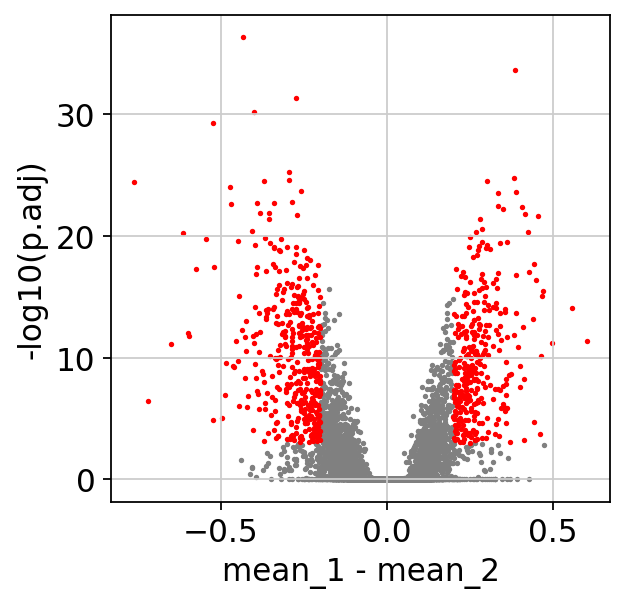

In [2]:
import multiome.marker_discovery as marker_discovery
stat_df = pd.read_csv('results/10X_B.markers.csv',index_col=0)
#stat_df_memB = stat_df.loc[stat_df['group']=='Intermediate B',:]
stat_df = marker_discovery.MarkerFilter(stat_df,
                                        min_pct_rna=0.1, min_pct_atac=0.05,
                                        mean_diff=0.2, p_cutoff=1e-3,
                                        plot=True)

In [3]:
import multiome.functional_anno as functional_anno
peaks = stat_df['name'].str.split('_').str[1].to_numpy()
peaks = np.unique(peaks)
print(len(peaks))
homer_df = functional_anno.run_HOMER_motif(peaks, out_dir='homer/',
                                           prefix='Bdev', ref_genome='hg38',
                                           homer_path='/mnt/atlas_local/chaozhong/data/homer/',
                                           split_symbol=['-','-'], size=200)

712
Save peaks list in BED file format at homer/Bdev_2.peaks.bed



	Position file = homer/Bdev_2.peaks.bed
	Genome = hg38
	Output Directory = homer/homer_Bdev_2
	Fragment size set to 200
	Found mset for "human", will check against vertebrates motifs
	Peak/BED file conversion summary:
		BED/Header formatted lines: 712
		peakfile formatted lines: 0

	Peak File Statistics:
		Total Peaks: 712
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	Peak file looks good!

	Background files for 200 bp fragments found.

	Extracting sequences from file: /mnt/atlas_local/chaozhong/data/homer/.//data/genomes/hg38///genome.fa
	Looking for peak sequences in a single file (/mnt/atlas_local/chaozhong/data/homer/.//data/genomes/hg38///genome.fa)
	Extracting 67 sequences from chr1
	Extracting 31 sequences from chr10
	Extracting 40 sequences from chr11
	Extracting 40 sequences from chr12
	Extracting 19 seque

		79.64% skipped, 20.36% checked (6697 of 32895), of those checked:
		0.00% not in target, 18.16% increased p-value, 0.00% high p-value
	Reading input files...
	49999 total sequences read
	Cache length = 11180
	Using binomial scoring

	Local Optimization Phase:
	1 of 25 Initial Sequence: GAGAGAGA... (-15.040)
		Round 1: -17.60 NAGAGAGN T:157.0(19.80%),B:6478.9(12.38%),P:1e-7
		Round 2: -19.29 GAGAGAGR T:135.0(17.28%),B:5242.8(10.14%),P:1e-8
		Round 3: -19.29 GAGAGAGR T:135.0(17.28%),B:5242.8(10.14%),P:1e-8
		=Final=: -8.21 GAGAGAGR T:185.0(25.98%),B:10070.3(20.54%),P:1e-3
		Performing exhaustive masking of motif...
		Reprioritizing potential motifs...
	2 of 25 Initial Sequence: CTTTCACT... (-11.127)
		Round 1: -18.75 CTTTCACT T:75.0(10.00%),B:2398.0(4.77%),P:1e-8
		Round 2: -21.22 CTTTSAYT T:133.0(17.05%),B:4946.7(9.60%),P:1e-9
		Round 3: -22.37 STTTSAYT T:114.0(14.80%),B:3943.5(7.73%),P:1e-9
		Round 4: -22.37 STTTSAYT T:114.0(14.80%),B:3943.5(7.73%),P:1e-9
		=Final=: -22.07 STTTSAYT T

		Reprioritizing potential motifs...
	12 of 25 Initial Sequence: GCTGCTTAGA... (-9.513)
		Round 1: -20.39 GCTGCTTAGA T:102.0(13.36%),B:3543.0(6.97%),P:1e-8
		Round 2: -20.39 GCTGCTTAGA T:102.0(13.36%),B:3543.0(6.97%),P:1e-8
		=Final=: -23.01 GCTGCTTAGA T:98.0(13.76%),B:3394.5(6.92%),P:1e-9
		Performing exhaustive masking of motif...
		Reprioritizing potential motifs...
	13 of 25 Initial Sequence: GGGCGAGTCA... (-9.111)
		Round 1: -20.11 GGGCGAGTCA T:17.0(2.36%),B:154.4(0.31%),P:1e-8
		Round 2: -20.11 GGGCGAGTCA T:17.0(2.36%),B:154.4(0.31%),P:1e-8
		=Final=: -22.47 GGGCGAGTCA T:17.0(2.39%),B:150.0(0.31%),P:1e-9
		Performing exhaustive masking of motif...
		Reprioritizing potential motifs...
	14 of 25 Initial Sequence: GTTGGGGACA... (-8.954)
		Round 1: -16.60 GTTGGGGACA T:86.0(11.39%),B:3070.0(6.07%),P:1e-7
		Round 2: -16.60 GTTGGGGACA T:86.0(11.39%),B:3070.0(6.07%),P:1e-7
		=Final=: -18.45 GTTGGGGACA T:84.0(11.80%),B:2996.6(6.11%),P:1e-8
		Performing exhaustive masking of motif...
		Rep

		Round 3: -23.98 TTTTATTTGCAG T:19.0(2.64%),B:158.0(0.32%),P:1e-10
		Round 4: -24.29 TTTTMTTTGCAG T:18.0(2.50%),B:134.0(0.27%),P:1e-10
		Round 5: -24.82 TTTTMTTTGCAG T:17.0(2.36%),B:111.2(0.23%),P:1e-10
		Round 6: -24.82 TTTTMTTTGCAG T:17.0(2.36%),B:111.2(0.23%),P:1e-10
		=Final=: -24.68 TTTTMTTTGCAG T:16.0(2.25%),B:111.2(0.23%),P:1e-10
		Performing exhaustive masking of motif...
		Reprioritizing potential motifs...
	15 of 25 Initial Sequence: GGCGGCTGCTGC... (-9.405)
		Round 1: -22.74 GGCGGCTGCTGC T:52.0(7.05%),B:1238.3(2.49%),P:1e-9
		Round 2: -24.08 GGCGGCTGCTGC T:30.0(4.13%),B:440.5(0.89%),P:1e-10
		Round 3: -24.08 GGCGGCTGCTGC T:30.0(4.13%),B:440.5(0.89%),P:1e-10
		=Final=: -24.23 GGCGGCTGCTGC T:27.0(3.79%),B:377.8(0.77%),P:1e-10
		Performing exhaustive masking of motif...
		Reprioritizing potential motifs...
	16 of 25 Initial Sequence: TCCCAGCTCCGC... (-9.404)
		Round 1: -19.49 TCCCAGCTCCGC T:14.0(1.95%),B:98.7(0.20%),P:1e-8
		Round 2: -20.93 TCCCCGCTCCGC T:15.0(2.09%),B:106.0(0

sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlo

sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlo

HOMER finished successfully! Please check the HTML report for interesting motifs.
motif_summary can be run with the motif index for further analysis.


sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
sh: 1: seqlogo: not found
	Formatting HTML page...
		1 of 31 (1e-13) similar to Egr1(Zf)/K562-Egr1-ChIP-Seq(GSE32465)/Homer(0.636)
		2 of 31 (1e-12) similar to ETS:E-box(ETS,bHLH)/HPC7-Scl-ChIP-Seq(GSE22178)/Homer(0.753)
		3 of 31 (1e-12) similar to POL008.1_DCE_S_I/Jaspar(0.605)
		4 of 31 (1e-11) similar to bZIP:IRF(bZIP,IRF)/Th17-BatF-ChIP-Seq(GSE39756)/Homer(0.708)
		5 of 31 (1e-11) similar to PB0181.1_Spdef_2/Jaspar(0.703)
		6 of 31 (1e-11) similar to MA0046.1_HNF1A/Jaspa

Next, please refer to the **knownResults.html** generated by Homer to check any motif of interested.  
Give the **motif index** to **motif_summary( )** function in functional_anno to extract the peaks related to it.

In [4]:
motif_peaks = functional_anno.motif_summary(peak_file='homer/Bdev.peaks.bed',
                                            homer_dir='homer/homer_Bdev/',
                                            motif_index=2, ref_genome='hg38',
                                            homer_path='/mnt/atlas_local/chaozhong/data/homer/')


	Position file = homer/Bdev_2.peaks.bed
	Genome = hg38
	Output Directory = homer/homer_Bdev_2/
	Will find motif(s) in homer/homer_Bdev_2/knownResults/known2.motif
	Fragment size set to 200
	Found mset for "human", will check against vertebrates motifs
	Peak/BED file conversion summary:
		BED/Header formatted lines: 712
		peakfile formatted lines: 0

	Peak File Statistics:
		Total Peaks: 712
		Redundant Peak IDs: 0
		Peaks lacking information: 0 (need at least 5 columns per peak)
		Peaks with misformatted coordinates: 0 (should be integer)
		Peaks with misformatted strand: 0 (should be either +/- or 0/1)

	Peak file looks good!

	Background files for 200 bp fragments found.

	Extracting sequences from file: /mnt/atlas_local/chaozhong/data/homer/.//data/genomes/hg38///genome.fa
	Looking for peak sequences in a single file (/mnt/atlas_local/chaozhong/data/homer/.//data/genomes/hg38///genome.fa)
	Extracting 67 sequences from chr1
	Extracting 31 sequences from chr10
	Extracting 40 sequence

HOMER finished successfully! Motif related peaks will be loaded and returned.



	Cleaning up tmp files...



In [7]:
stat_df['peaks'] = stat_df['name'].str.split('_').str[1]
stat_df['genes'] = stat_df['name'].str.split('_').str[0]

gp_df = stat_df.loc[stat_df['peaks'].isin(motif_peaks['peaks']),['genes','peaks']].copy()
gp_df.index = gp_df['peaks']
gp_df['genes'].to_csv('homer/homer_Bdev/Spi1_genes.txt',index=False, header=False)